# REGRESI NON-LINEAR DENGAN POLYNOMIAL REGRESSION UNTUK MENGANALISIS FAKTOR YANG MEMPENGARUHI WORK LIFE BALANCE PADA DATASET Impact_of_Remote_Work_on_Mental_Health
Oleh :
1. Bunga Aprilian (23083010003)
2. Amelia Zafira Karnaen (23083010019)

In [ ]:
import pandas as pd
file_path = '/content/Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv(file_path)

In [65]:
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Burnout,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [66]:
data.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Industry,object
Years_of_Experience,int64
Work_Location,object
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [67]:
print(data.isnull().sum())

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [68]:
# Mengisi Missing Values untuk Kolom/variabel Kategori dengan Modus
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Burnout,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [69]:
# Memilih kolom/variabel yang relevan untuk analisis
columns_to_keep = [
    'Work_Life_Balance_Rating', 'Stress_Level', 'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings', 'Job_Role', 'Company_Support_for_Remote_Work',
    'Satisfaction_with_Remote_Work', 'Sleep_Quality',
    'Access_to_Mental_Health_Resources', 'Social_Isolation_Rating'
]
df_selected = data[columns_to_keep]

In [70]:
# Mengkonversi kolom/variabel kategorik ke numerik
from sklearn.preprocessing import LabelEncoder
categorical_columns = [
    'Stress_Level', 'Job_Role', 'Satisfaction_with_Remote_Work',
    'Sleep_Quality', 'Access_to_Mental_Health_Resources'
]

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le
print(data_cleaned.head())

   Work_Life_Balance_Rating  Stress_Level  Hours_Worked_Per_Week  \
0                         2             2                     47   
1                         1             2                     52   
2                         5             2                     46   
3                         4             0                     32   
4                         2             0                     35   

   Number_of_Virtual_Meetings  Job_Role  Company_Support_for_Remote_Work  \
0                           7         2                                1   
1                           4         0                                2   
2                          11         6                                5   
3                           8         6                                3   
4                          12         5                                3   

   Satisfaction_with_Remote_Work  Sleep_Quality  \
0                              2              1   
1                              1

In [71]:
# Menentukan variabel independen dan dependen
X = data_cleaned.drop('Work_Life_Balance_Rating', axis=1)
y = data_cleaned['Work_Life_Balance_Rating']

## REGRESI NON-LINEAR DENGAN POLYNOMIAL REGRESSION

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform data to polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Buat model regresi
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prediksi
y_pred = model.predict(X_test_poly)

In [73]:
# UJI KECOCOKAN MODEL
from sklearn.metrics import r2_score

# Koefisien determinasi
r2 = r2_score(y_test, y_pred)

In [74]:
#UJI ASUMSI MULTIKOLINEARITAS
import numpy as np

# Hitung Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                             Feature       VIF
0                       Stress_Level  2.361914
1              Hours_Worked_Per_Week  8.001942
2         Number_of_Virtual_Meetings  3.355413
3                           Job_Role  3.077269
4    Company_Support_for_Remote_Work  4.829279
5      Satisfaction_with_Remote_Work  2.384031
6                      Sleep_Quality  2.421135
7  Access_to_Mental_Health_Resources  1.890073
8            Social_Isolation_Rating  4.773443


**VIF = 1**: Tidak ada multikolinearitas (variabel independen benar-benar bebas satu sama lain).
**VIF > 1 dan < 5**: Multikolinearitas rendah hingga sedang, biasanya masih dapat diterima.
**VIF ≥ 5**: Multikolinearitas signifikan, perlu diwaspadai karena dapat memengaruhi stabilitas estimasi.



In [75]:
# KOEFISIEN DETERMINASI
print(f"Koefisien Determinasi (R²): {r2}")

Koefisien Determinasi (R²): -0.021562018443212372


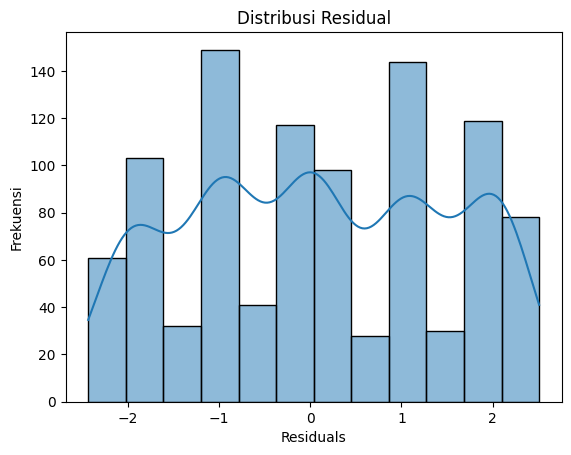

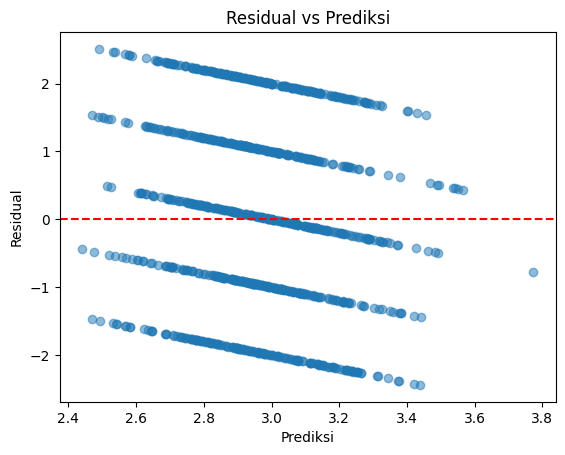

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# RESIDUAL
residual = y_test - y_pred

# Plot distribusi residual
sns.histplot(residual, kde=True)
plt.title("Distribusi Residual")
plt.xlabel("Residuals")
plt.ylabel("Frekuensi")
plt.show()

# Plot residual vs prediksi
plt.scatter(y_pred, residual, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual vs Prediksi")
plt.xlabel("Prediksi")
plt.ylabel("Residual")
plt.show()

**Gambar pertama** histogram distribusi residual yang seharusnya berbentuk lonceng jika memenuhi asumsi normalitas. Namun, distribusi residual pada gambar ini tidak berbentuk normal dan terlihat memiliki pola bergelombang. Hal ini menandakan bahwa asumsi distribusi normal untuk residual tidak terpenuhi.

**Gambar kedua** menunjukkan hubungan antara residual (kesalahan prediksi) dan nilai prediksi. Pada dasarnya, residual harus tersebar secara acak di sekitar garis nol tanpa membentuk pola tertentu. Namun, pada gambar ini terlihat adanya pola yang terstruktur, mengindikasikan bahwa asumsi independen residual tidak terpenuhi.

In [77]:
from sklearn.metrics import mean_squared_error

# RMSE/ ROOT MEAN SQUARED ERROR
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 1.3949416255429705


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error

# Asumsi: Nama fitur tersedia
feature_names = [f"x{i+1}" for i in range(X_train_poly.shape[1])]  # Berikan nama fitur

# Tambahkan konstanta ke data
X_train_poly_const = sm.add_constant(X_train_poly)
X_test_poly_const = sm.add_constant(X_test_poly)

# Fit model dengan statsmodels
model_sm = sm.OLS(y_train, X_train_poly_const).fit()

# Menampilkan ringkasan model
print(model_sm.summary())

                               OLS Regression Results                               
Dep. Variable:     Work_Life_Balance_Rating   R-squared:                       0.017
Model:                                  OLS   Adj. R-squared:                  0.004
Method:                       Least Squares   F-statistic:                     1.315
Date:                      Sun, 24 Nov 2024   Prob (F-statistic):             0.0632
Time:                              01:48:47   Log-Likelihood:                -7036.0
No. Observations:                      4000   AIC:                         1.418e+04
Df Residuals:                          3946   BIC:                         1.452e+04
Df Model:                                53                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [79]:
# RMSE pada data uji
y_pred = model_sm.predict(X_test_poly_const)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"\nRMSE: {rmse:.4f}")


RMSE: 1.3949


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
# Tabel hasil uji t (Koefisien dan p-value)
print("\nHasil Uji Hipotesis t:")
summary_df = pd.DataFrame({
    "Feature": feature_names,  # Gunakan hanya feature_names
    "Coef": model_sm.params,
    "Std Err": model_sm.bse,
    "t-value": model_sm.tvalues,
    "p-value": model_sm.pvalues
})
print(summary_df)


Hasil Uji Hipotesis t:
      Feature      Coef   Std Err   t-value   p-value
const      x1  2.600441  0.541123  4.805638  0.000002
x1         x2 -0.106990  0.178128 -0.600636  0.548117
x2         x3 -0.006045  0.016605 -0.364070  0.715825
x3         x4  0.052171  0.031117  1.676606  0.093699
x4         x5  0.018243  0.070840  0.257522  0.796789
x5         x6  0.235012  0.115736  2.030585  0.042364
x6         x7  0.126220  0.180423  0.699579  0.484231
x7         x8  0.028264  0.177885  0.158886  0.873766
x8         x9  0.220729  0.123796  1.783012  0.074661
x9        x10 -0.177704  0.115967 -1.532359  0.125514
x10       x11 -0.064293  0.047833 -1.344102  0.178993
x11       x12  0.002897  0.002305  1.256713  0.208932
x12       x13 -0.008123  0.005983 -1.357707  0.174634
x13       x14  0.008899  0.013731  0.648130  0.516938
x14       x15 -0.012694  0.019821 -0.640421  0.521936
x15       x16  0.037499  0.033868  1.107210  0.268271
x16       x17  0.002348  0.033774  0.069522  0.944578
x17 

In [81]:
# Keputusan H₀ (terima atau tolak berdasarkan p-value)
alpha = 0.05  # Tingkat signifikansi
print("\nKeputusan Hipotesis:")
for feature, p_value in zip(summary_df["Feature"], summary_df["p-value"]):
    if p_value < alpha:
        print(f"Menolak H₀: Ada hubungan signifikan antara {feature} dan Work_Life_Balance_Rating (p-value: {p_value:.4e})")
    else:
        print(f"Menerima H₀: Tidak ada hubungan signifikan antara {feature} dan Work_Life_Balance_Rating (p-value: {p_value:.4e})")


Keputusan Hipotesis:
Menolak H₀: Ada hubungan signifikan antara x1 dan Work_Life_Balance_Rating (p-value: 1.6000e-06)
Menerima H₀: Tidak ada hubungan signifikan antara x2 dan Work_Life_Balance_Rating (p-value: 5.4812e-01)
Menerima H₀: Tidak ada hubungan signifikan antara x3 dan Work_Life_Balance_Rating (p-value: 7.1583e-01)
Menerima H₀: Tidak ada hubungan signifikan antara x4 dan Work_Life_Balance_Rating (p-value: 9.3699e-02)
Menerima H₀: Tidak ada hubungan signifikan antara x5 dan Work_Life_Balance_Rating (p-value: 7.9679e-01)
Menolak H₀: Ada hubungan signifikan antara x6 dan Work_Life_Balance_Rating (p-value: 4.2364e-02)
Menerima H₀: Tidak ada hubungan signifikan antara x7 dan Work_Life_Balance_Rating (p-value: 4.8423e-01)
Menerima H₀: Tidak ada hubungan signifikan antara x8 dan Work_Life_Balance_Rating (p-value: 8.7377e-01)
Menerima H₀: Tidak ada hubungan signifikan antara x9 dan Work_Life_Balance_Rating (p-value: 7.4661e-02)
Menerima H₀: Tidak ada hubungan signifikan antara x10 da

In [82]:
# Arah hubungan (positif atau negatif)
print("\nArah Uji Hipotesis:")
for feature, coef in zip(summary_df["Feature"], summary_df["Coef"]):
    if coef > 0:
        print(f"Hubungan positif antara {feature} dan Work_Life_Balance_Rating (koefisien: {coef:.4f})")
    elif coef < 0:
        print(f"Hubungan negatif antara {feature} dan Work_Life_Balance_Rating (koefisien: {coef:.4f})")
    else:
        print(f"Tidak ada hubungan antara {feature} dan Work_Life_Balance_Rating (koefisien: {coef:.4f})")


Arah Uji Hipotesis:
Hubungan positif antara x1 dan Work_Life_Balance_Rating (koefisien: 2.6004)
Hubungan negatif antara x2 dan Work_Life_Balance_Rating (koefisien: -0.1070)
Hubungan negatif antara x3 dan Work_Life_Balance_Rating (koefisien: -0.0060)
Hubungan positif antara x4 dan Work_Life_Balance_Rating (koefisien: 0.0522)
Hubungan positif antara x5 dan Work_Life_Balance_Rating (koefisien: 0.0182)
Hubungan positif antara x6 dan Work_Life_Balance_Rating (koefisien: 0.2350)
Hubungan positif antara x7 dan Work_Life_Balance_Rating (koefisien: 0.1262)
Hubungan positif antara x8 dan Work_Life_Balance_Rating (koefisien: 0.0283)
Hubungan positif antara x9 dan Work_Life_Balance_Rating (koefisien: 0.2207)
Hubungan negatif antara x10 dan Work_Life_Balance_Rating (koefisien: -0.1777)
Hubungan negatif antara x11 dan Work_Life_Balance_Rating (koefisien: -0.0643)
Hubungan positif antara x12 dan Work_Life_Balance_Rating (koefisien: 0.0029)
Hubungan negatif antara x13 dan Work_Life_Balance_Rating (ko